In [1]:
!pip install geodatasets

In [4]:
import geodatasets

geodatasets.data.flatten().keys()

dict_keys(['geoda.airbnb', 'geoda.atlanta', 'geoda.cars', 'geoda.charleston1', 'geoda.charleston2', 'geoda.chicago_health', 'geoda.chicago_commpop', 'geoda.chile_labor', 'geoda.cincinnati', 'geoda.cleveland', 'geoda.grid100', 'geoda.groceries', 'geoda.guerry', 'geoda.health', 'geoda.health_indicators', 'geoda.hickory1', 'geoda.hickory2', 'geoda.home_sales', 'geoda.houston', 'geoda.juvenile', 'geoda.lansing1', 'geoda.lansing2', 'geoda.lasrosas', 'geoda.liquor_stores', 'geoda.malaria', 'geoda.milwaukee1', 'geoda.milwaukee2', 'geoda.ncovr', 'geoda.natregimes', 'geoda.ndvi', 'geoda.nepal', 'geoda.nyc', 'geoda.nyc_earnings', 'geoda.nyc_education', 'geoda.nyc_neighborhoods', 'geoda.orlando1', 'geoda.orlando2', 'geoda.oz9799', 'geoda.phoenix_acs', 'geoda.police', 'geoda.sacramento1', 'geoda.sacramento2', 'geoda.savannah1', 'geoda.savannah2', 'geoda.seattle1', 'geoda.seattle2', 'geoda.sids', 'geoda.sids2', 'geoda.south', 'geoda.spirals', 'geoda.stlouis', 'geoda.tampa1', 'geoda.us_sdoh', 'ny.bb

In [6]:
import geopandas as gpd

airbnb = geodatasets.get_url('geoda.airbnb')
gdf = gpd.read_file(airbnb)
gdf.head()

,community,shape_area,shape_len,AREAID,response_r,accept_r,rev_rating,price_pp,room_type,num_spots,...,crowded,dependency,without_hs,unemployed,income_pc,harship_in,num_crimes,num_theft,population,geometry
0,DOUGLAS,46004621.1581,31027.0545098,35,98.771429,94.514286,87.777778,78.157895,1.789474,38,...,1.8,30.7,14.3,18.2,23791,47,5013,1241,18238,"POLYGON ((-87.60914 41.84469, -87.60915 41.844..."
1,OAKLAND,16913961.0408,19565.5061533,36,99.200000,90.105263,88.812500,53.775000,1.850000,20,...,1.3,40.4,18.4,28.7,19252,78,1306,311,5918,"POLYGON ((-87.59215 41.81693, -87.59231 41.816..."
2,FULLER PARK,19916704.8692,None,37,68.000000,NaN,91.750000,84.000000,1.833333,6,...,3.2,44.9,26.6,33.9,10432,97,1764,383,2876,"POLYGON ((-87.6288 41.80189, -87.62879 41.8017..."
3,GRAND BOULEVARD,48492503.1554,28196.8371573,38,94.037037,83.615385,92.750000,119.533333,1.533333,30,...,3.3,39.5,15.9,24.3,23472,57,6416,1428,21929,"POLYGON ((-87.60671 41.81681, -87.6067 41.8165..."
4,KENWOOD,29071741.9283,23325.1679062,39,92.542857,88.142857,90.656250,77.991453,1.615385,39,...,2.4,35.4,11.3,15.7,35911,26,2713,654,17841,"POLYGON ((-87.59215 41.81693, -87.59215 41.816..."


In [7]:
gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 21 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   community   77 non-null     object  
 1   shape_area  77 non-null     object  
 2   shape_len   76 non-null     object  
 3   AREAID      77 non-null     int64   
 4   response_r  68 non-null     float64 
 5   accept_r    67 non-null     float64 
 6   rev_rating  67 non-null     float64 
 7   price_pp    69 non-null     float64 
 8   room_type   69 non-null     float64 
 9   num_spots   77 non-null     int64   
 10  poverty     77 non-null     float64 
 11  crowded     77 non-null     float64 
 12  dependency  77 non-null     float64 
 13  without_hs  77 non-null     float64 
 14  unemployed  77 non-null     float64 
 15  income_pc   77 non-null     int64   
 16  harship_in  77 non-null     int64   
 17  num_crimes  77 non-null     int64   
 18  num_theft   77 non-null     int64   
 19  po

In [8]:
import warnings

warnings.filterwarnings('ignore')

# Geometric Manipulations

## Buffering

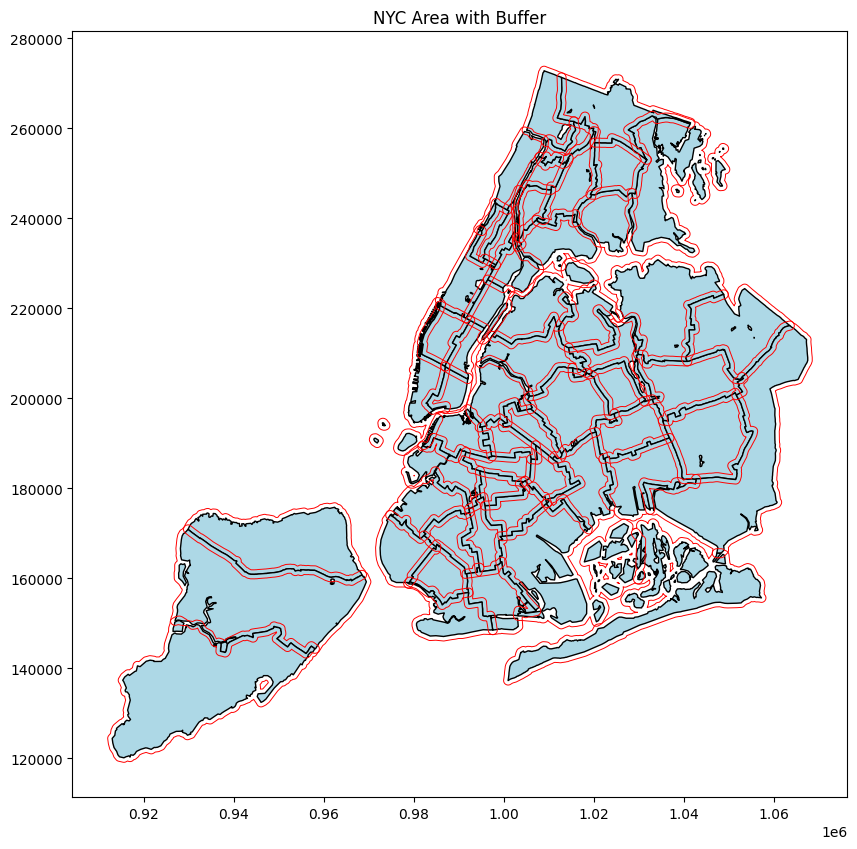

In [12]:
import matplotlib.pyplot as plt

nyc = geodatasets.get_url('geoda.nyc')
gdf_nyc = gpd.read_file(nyc)

# Create a buffered geometry
gdf_nyc['buffered'] = gdf_nyc.geometry.buffer(1000)      # Buffer by 1000 meters

# Plot the original geometry and the buffered geometry
fig, ax = plt.subplots(figsize=(10,10))
gdf_nyc.plot(ax=ax, color='lightblue', edgecolor='black')
gdf_nyc['buffered'].plot(ax=ax, color='none', edgecolor='red', linewidth=0.7)

plt.title('NYC Area with Buffer')
plt.show()

## Simplification

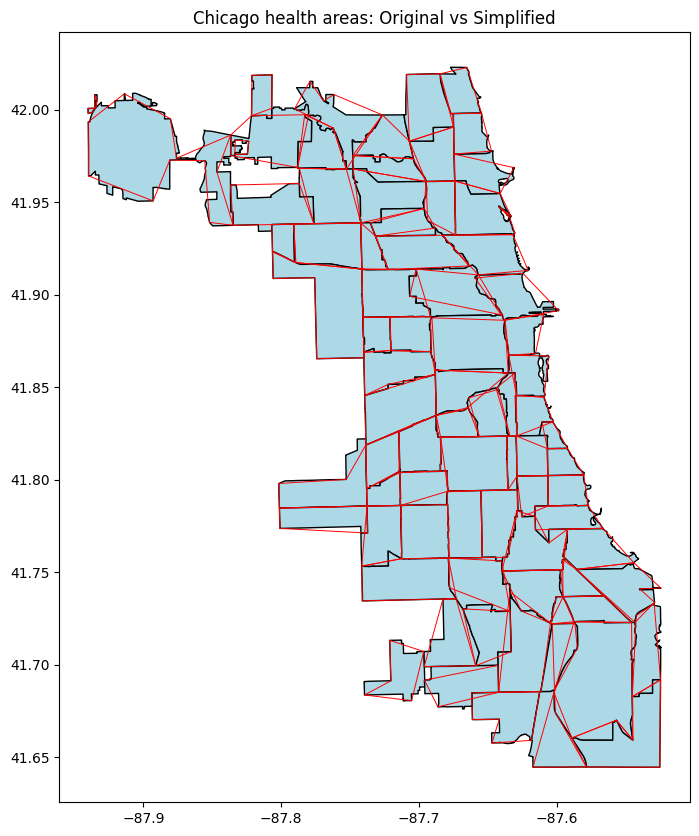

In [16]:
chicago_health = geodatasets.get_url('geoda.chicago_health')
gdf_chicago_health = gpd.read_file(chicago_health)

# Simplify the geometries
gdf_chicago_health['simplified'] = gdf_chicago_health.geometry.simplify(0.01)

fig, ax = plt.subplots(figsize=(10,10))
gdf_chicago_health.plot(ax=ax, color='lightblue', edgecolor='black')
gdf_chicago_health['simplified'].plot(ax=ax, color='none', edgecolor='red', linewidth=0.7)

plt.title('Chicago health areas: Original vs Simplified')
plt.show()

## Centroid

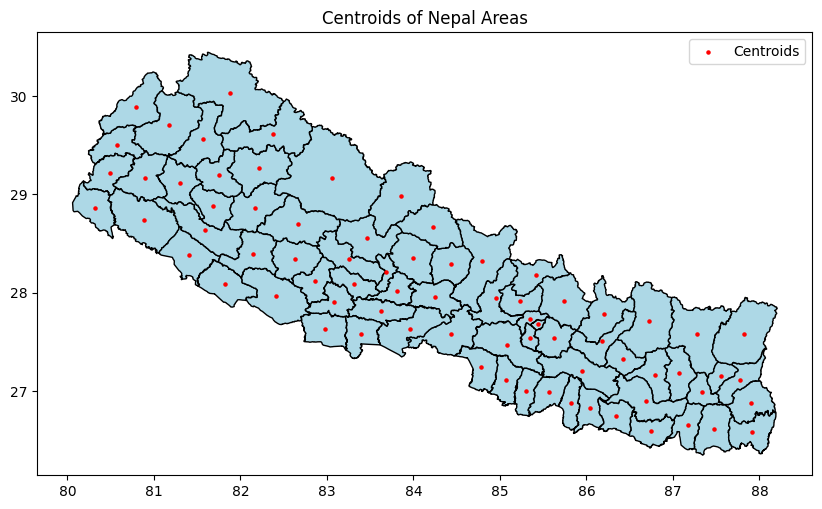

In [21]:
nepal = geodatasets.get_url('geoda.nepal')
gdf_nepal = gpd.read_file(nepal)

gdf_nepal['centroid'] = gdf_nepal.geometry.centroid

fig, ax = plt.subplots(figsize=(10,10))
gdf_nepal.plot(ax=ax, color='lightblue', edgecolor='black', label='Original Area')
gdf_nepal['centroid'].plot(ax=ax, color='red', marker='o', markersize=5, label='Centroids')

plt.title('Centroids of Nepal Areas')
plt.legend()
plt.show()

## Convex Hull

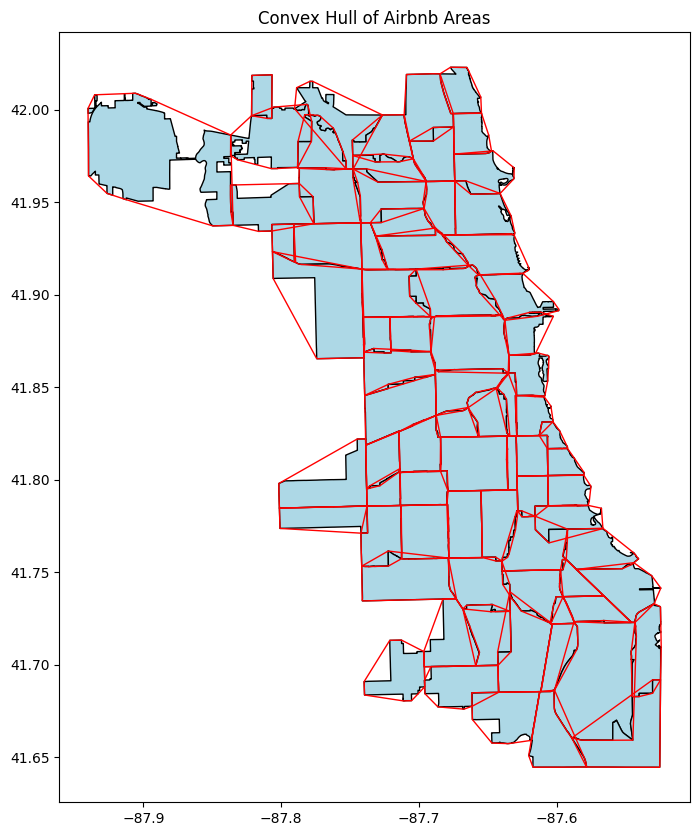

In [22]:
airbnb = geodatasets.get_url('geoda.airbnb')
gdf_airbnb = gpd.read_file(airbnb)

gdf_airbnb['convex_hull'] = gdf_airbnb.geometry.convex_hull

fig, ax = plt.subplots(figsize=(10,10))
gdf_airbnb.plot(ax=ax, color='lightblue', edgecolor='black')
gdf_airbnb['convex_hull'].plot(ax=ax, color='none', edgecolor='red', linewidth=1)

plt.title('Convex Hull of Airbnb Areas')
plt.show()